In [66]:
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
from safe_control_gym.lyapunov.lyapunov import *
from safe_control_gym.lyapunov.utilities import *
from safe_control_gym.experiments.arxiv.utils.gpmpc_plotting_utils import *

In [67]:
M_large = 1800
M_true = 1000
M_small = 200

# load the mean_cost and std_cost

mean_std_cost_M_large = np.load('mean_std_cost_M_{}.npz'.format(M_large), allow_pickle=True)
mean_std_cost_M_true = np.load('mean_std_cost_M_{}.npz'.format(M_true), allow_pickle=True)
mean_std_cost_M_small = np.load('mean_std_cost_M_{}.npz'.format(M_small), allow_pickle=True)

mean_cost_M_large: [71342.30550448  2592.91660674  2027.53077794  2537.66277741
 12087.29713901 12904.41633156  2418.01282738]


(0.0, 249637.83062779717)

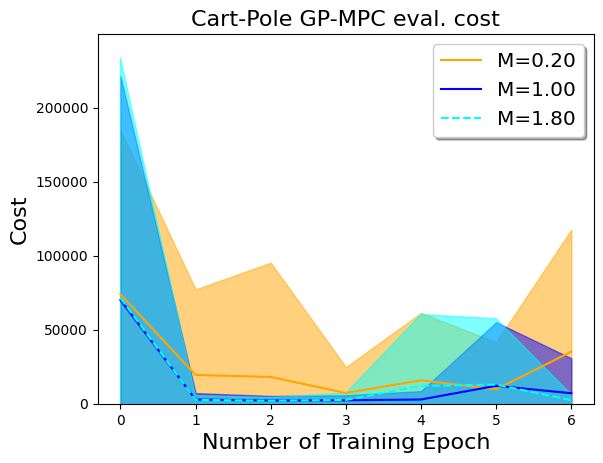

In [70]:
mean_cost_M_large = mean_std_cost_M_large['mean_cost']
print('mean_cost_M_large:', mean_cost_M_large)
mean_cost_M_true = mean_std_cost_M_true['mean_cost']
mean_cost_M_small = mean_std_cost_M_small['mean_cost']

std_cost_M_large = mean_std_cost_M_large['std_cost']
std_cost_M_true = mean_std_cost_M_true['std_cost']
std_cost_M_small = mean_std_cost_M_small['std_cost']

s = 2 # times of std
# color
color_M_large = 'cyan'
color_M_true = 'blue'
color_M_small = 'orange'

x = [i for i in range(len(mean_cost_M_large))]
# x = mean_std_cost_M_large['num_points_per_epoch']

# plot

plt.plot(x, mean_cost_M_small, color=color_M_small, label='M={:.2f}'.format(M_small* 1e-3))
plt.fill_between(x, mean_cost_M_small - s * std_cost_M_small, mean_cost_M_small + s * std_cost_M_small, alpha=0.5, color=color_M_small)
plt.plot(x, mean_cost_M_true, color=color_M_true, label='M={:.2f}'.format(M_true* 1e-3))
plt.fill_between(x, mean_cost_M_true - s * std_cost_M_true, mean_cost_M_true + s * std_cost_M_true, alpha=0.5, color=color_M_true)
plt.plot(x, mean_cost_M_large, color=color_M_large, label='M={:.2f}'.format(M_large* 1e-3), linestyle='--')
plt.fill_between(x, mean_cost_M_large - s * std_cost_M_large, mean_cost_M_large + s * std_cost_M_large, alpha=0.5, color=color_M_large)
legend = plt.legend(loc='upper right', shadow=True, fontsize='x-large')
# axis
plt.xlabel('Number of Training Epoch', fontsize=16)
plt.ylabel('Cost', fontsize=16)
# title
plt.title('Cart-Pole GP-MPC eval. cost', fontsize=16)

# get the current axes
ax = plt.gca()
# ax.set_yscale('log')
plt.ylim(0, None)